# Navigable Small World

Een mogelijke implementatie van het NSW algoritme, dit is een gesimplifieerde implementatie, waar vooral leesbaarheid e.d. prioriteit kregen.

In [3]:
import numpy as np
import heapq  # Priority queue
import logging
import math
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

class Node:
    def __init__(self, idx, data):
        self.idx = idx  # unique identifier
        self.data = data  # feature vector
        self.neighbors = []  # neighboring nodes

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)

class NSWGraph:
    def __init__(self, m=3):
        self.graph = []
        self.m = m # maximum number of edges each node has

    def distance(self, node1, node2):
        return math.sqrt(sum((x-y)**2 for x, y in zip(node1.data, node2.data)))

    def insert(self, node):
        logging.info(f"Inserting node {node.idx} with vector {node.data} into the graph...")
        if len(self.graph) > 0:
            candidates = self.graph[:]
            for _ in range(self.m):
                if not candidates:
                    break
                nearest = min(candidates, key=lambda x: self.distance(x, node))
                node.add_neighbor(nearest)
                nearest.add_neighbor(node)
                candidates.remove(nearest)
                logging.info(f"Node {node.idx} connected with node {nearest.idx}")
        self.graph.append(node)
        logging.info(f"Node {node.idx} inserted.\n")

    def search(self, query, k):
        logging.info(f"Searching {k} nearest neighbors for node {query.data}...")
        visited = set()
        candidates = [(0, self.graph[0])]
        nearest_neighbors = []

        while candidates and len(nearest_neighbors) < k:
            _, current_node = heapq.heappop(candidates)
            if current_node in visited:
                continue
            visited.add(current_node)

            d = self.distance(current_node, query)
            if len(nearest_neighbors) < k or d < nearest_neighbors[-1][0]:
                heapq.heappush(nearest_neighbors, (d, current_node))
                if len(nearest_neighbors) > k:
                    heapq.heappop(nearest_neighbors)
                logging.info(f"Node {current_node.idx} considered as a neighbor with distance {d:.4f}")

            for neighbor in current_node.neighbors:
                if neighbor not in visited:
                    heapq.heappush(candidates, (self.distance(neighbor, query), neighbor))

        logging.info(f"Search complete. {k} nearest neighbors found.\n")
        return [x[1] for x in nearest_neighbors]

def visualize_nsw(graph, query=None, k_neighbors=None):
    plt.figure(figsize=(10, 10))

    # Plot all nodes
    for node in graph:
        plt.plot(node.data[0], node.data[1], 'bo')

    # Plot edges
    for node in graph:
        for neighbor in node.neighbors:
            plt.plot([node.data[0], neighbor.data[0]], [node.data[1], neighbor.data[1]], 'b-')

    # Highlight query node if provided
    if query is not None:
        plt.plot(query.data[0], query.data[1], 'go', markersize=10)

    # Highlight and connect k-nearest neighbors if provided
    if k_neighbors is not None:
        for neighbor in k_neighbors:
            plt.plot(neighbor.data[0], neighbor.data[1], 'ro')
            if query is not None:
                plt.plot([query.data[0], neighbor.data[0]], [query.data[1], neighbor.data[1]], 'r--')

    plt.title("Navigable Small-World Graph")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()



Als we nu deze code eens testen door 10 vectoren toe te voegen (2D vectoren, zodat we kunnen visualiseren)
Speel met de gezochte Node, en zie dat alles effectief werkt

INFO:root:Inserting node 0 with vector [0.5488135  0.71518937] into the graph...
INFO:root:Node 0 inserted.

INFO:root:Inserting node 1 with vector [0.60276338 0.54488318] into the graph...
INFO:root:Node 1 connected with node 0
INFO:root:Node 1 inserted.

INFO:root:Inserting node 2 with vector [0.4236548  0.64589411] into the graph...
INFO:root:Node 2 connected with node 0
INFO:root:Node 2 connected with node 1
INFO:root:Node 2 inserted.

INFO:root:Inserting node 3 with vector [0.43758721 0.891773  ] into the graph...
INFO:root:Node 3 connected with node 0
INFO:root:Node 3 connected with node 2
INFO:root:Node 3 connected with node 1
INFO:root:Node 3 inserted.

INFO:root:Inserting node 4 with vector [0.96366276 0.38344152] into the graph...
INFO:root:Node 4 connected with node 1
INFO:root:Node 4 connected with node 0
INFO:root:Node 4 connected with node 2
INFO:root:Node 4 inserted.

INFO:root:Inserting node 5 with vector [0.79172504 0.52889492] into the graph...
INFO:root:Node 5 connec

K-Nearest Neighbors:
9
0
6


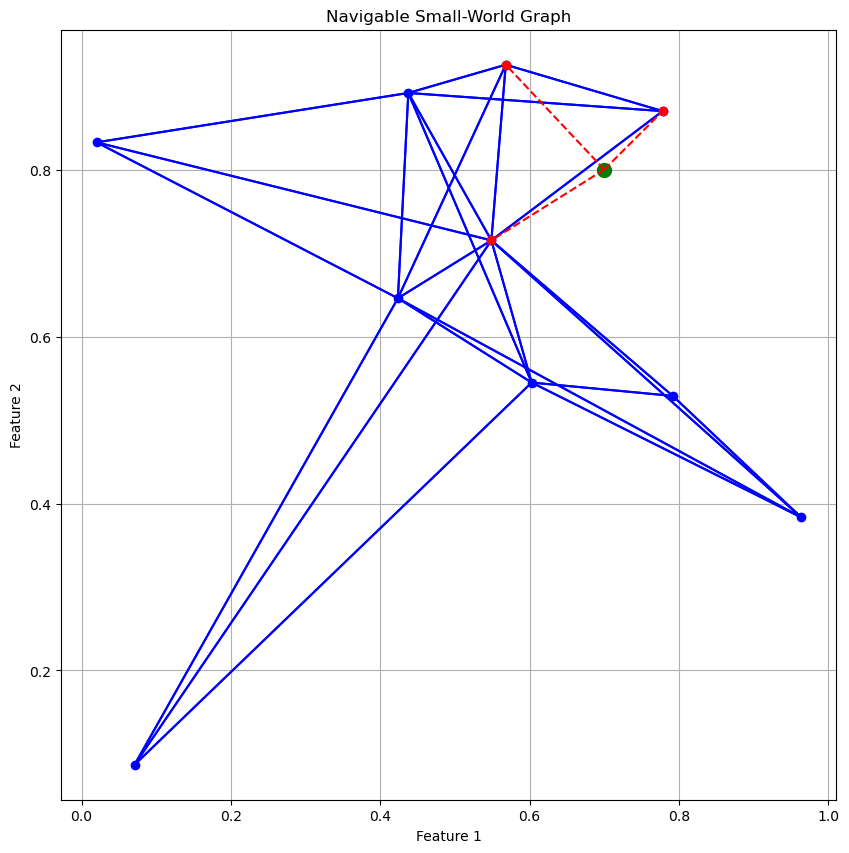

In [4]:
np.random.seed(0)
data_points = np.random.rand(10, 2)  # Using 10 data points for simplicity and clearer logging

nsw_graph = NSWGraph(m=3)

for idx, data in enumerate(data_points):
    nsw_graph.insert(Node(idx, data))


query = Node(-1, np.array([0.7, 0.8]))

k_neighbors = nsw_graph.search(query, k=3)

print("K-Nearest Neighbors:")
for neighbor in k_neighbors:
    print(neighbor.idx)

visualize_nsw(nsw_graph.graph, query, k_neighbors)


Het concept 'small world' komt hier wel niet echt naar boven, het idee is dat er soms grote sprongen gemaakt kunnen worden in de wereld en zo alles dichtbij is. We gaan de code eens opnieuw draaien maar nu met een specifiek gemaakt voorbeeld.

We connecteren altijd met de M dichtste nodes, we zetten in dit voorbeeld M op 1, en toch is er altijd connectie tussen alle nodes, bekijk de insert methode om te snappen hoe dit komt.

INFO:root:Inserting node 0 with vector [1. 1.] into the graph...
INFO:root:Node 0 inserted.

INFO:root:Inserting node 1 with vector [1.2 1.1] into the graph...
INFO:root:Node 1 connected with node 0
INFO:root:Node 1 inserted.

INFO:root:Inserting node 2 with vector [0.9 1.3] into the graph...
INFO:root:Node 2 connected with node 0
INFO:root:Node 2 inserted.

INFO:root:Inserting node 3 with vector [1.1 0.9] into the graph...
INFO:root:Node 3 connected with node 0
INFO:root:Node 3 inserted.

INFO:root:Inserting node 4 with vector [1.  1.2] into the graph...
INFO:root:Node 4 connected with node 2
INFO:root:Node 4 inserted.

INFO:root:Inserting node 5 with vector [4. 4.] into the graph...
INFO:root:Node 5 connected with node 1
INFO:root:Node 5 inserted.

INFO:root:Inserting node 6 with vector [4.2 4.1] into the graph...
INFO:root:Node 6 connected with node 5
INFO:root:Node 6 inserted.

INFO:root:Inserting node 7 with vector [3.9 4.3] into the graph...
INFO:root:Node 7 connected with node 5

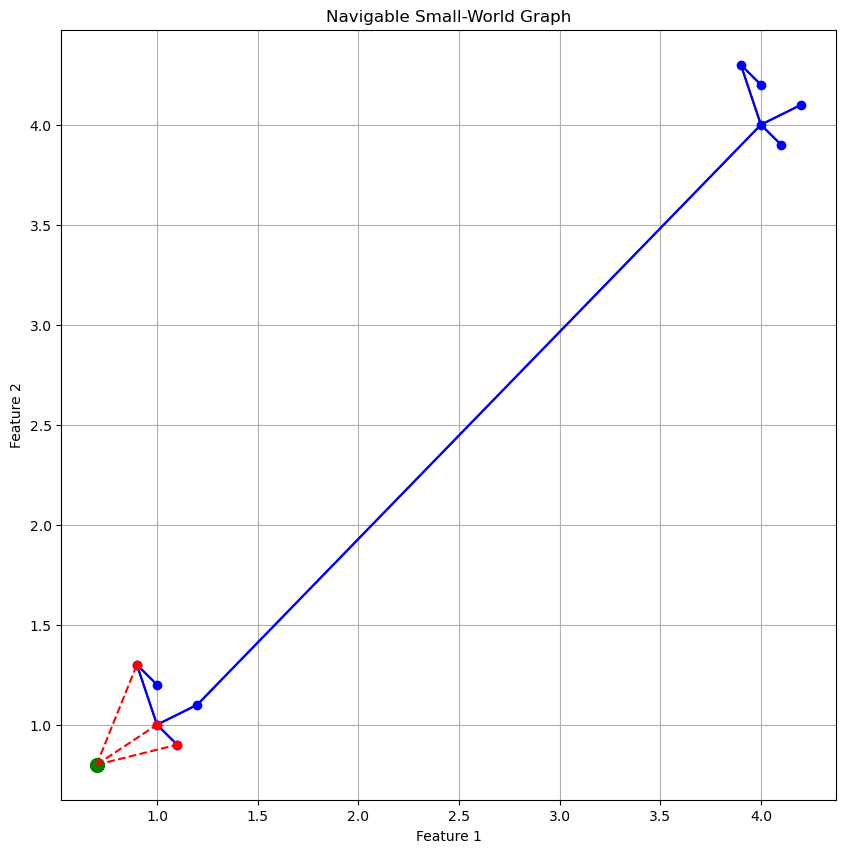

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 2D points in two separate clusters
data_points = np.array([
    [1, 1], [1.2, 1.1], [0.9, 1.3], [1.1, 0.9], [1, 1.2],  # Cluster 1
    [4, 4], [4.2, 4.1], [3.9, 4.3], [4.1, 3.9], [4, 4.2]   # Cluster 2
])

# Initialize NSW graph with m=1 which is quite small
nsw_graph = NSWGraph(m=1)

# Insert nodes into the graph
for idx, point in enumerate(data_points):
    nsw_graph.insert(Node(idx, point))

query = Node(-1, np.array([0.7, 0.8]))

k_neighbors = nsw_graph.search(query, k=3)

visualize_nsw(nsw_graph.graph, query, k_neighbors)



Het is mogelijk dat we ook nodes verwijderen uit onze NSW graph, en dan riskeert dat we eindigen met verschillende clusters die niet langer geconnecteerd zijn.
Voer de volgende twee blokken code uit om dit aan het werk te zien.

Probeer nadien de functie `ensure_connectivity` te implementeren om dit te voorkomen en te zorgen dat alles weer geconnecteerd is. 
Als algoritme wil je waarschijnlijk iets al volgt doen: de graph doorlopen om te zien of alle nodes bezocht zijn (met depth first search bijvoorbeeld), dan voor elke component die niet geconnecteerd is een connectie toevoegen naar zijn dichtste buur.

INFO:root:Inserting node 0 with vector [1. 1.] into the graph...
INFO:root:Node 0 inserted.

INFO:root:Inserting node 1 with vector [1.2 1.1] into the graph...
INFO:root:Node 1 connected with node 0
INFO:root:Node 1 inserted.

INFO:root:Inserting node 2 with vector [0.9 1.3] into the graph...
INFO:root:Node 2 connected with node 0
INFO:root:Node 2 inserted.

INFO:root:Inserting node 3 with vector [1.1 0.9] into the graph...
INFO:root:Node 3 connected with node 0
INFO:root:Node 3 inserted.

INFO:root:Inserting node 4 with vector [1.  1.2] into the graph...
INFO:root:Node 4 connected with node 2
INFO:root:Node 4 inserted.

INFO:root:Inserting node 5 with vector [4. 4.] into the graph...
INFO:root:Node 5 connected with node 1
INFO:root:Node 5 inserted.

INFO:root:Inserting node 6 with vector [4.2 4.1] into the graph...
INFO:root:Node 6 connected with node 5
INFO:root:Node 6 inserted.

INFO:root:Inserting node 7 with vector [3.9 4.3] into the graph...
INFO:root:Node 7 connected with node 5

Removing node with idx: 5
Node with idx 5 removed.


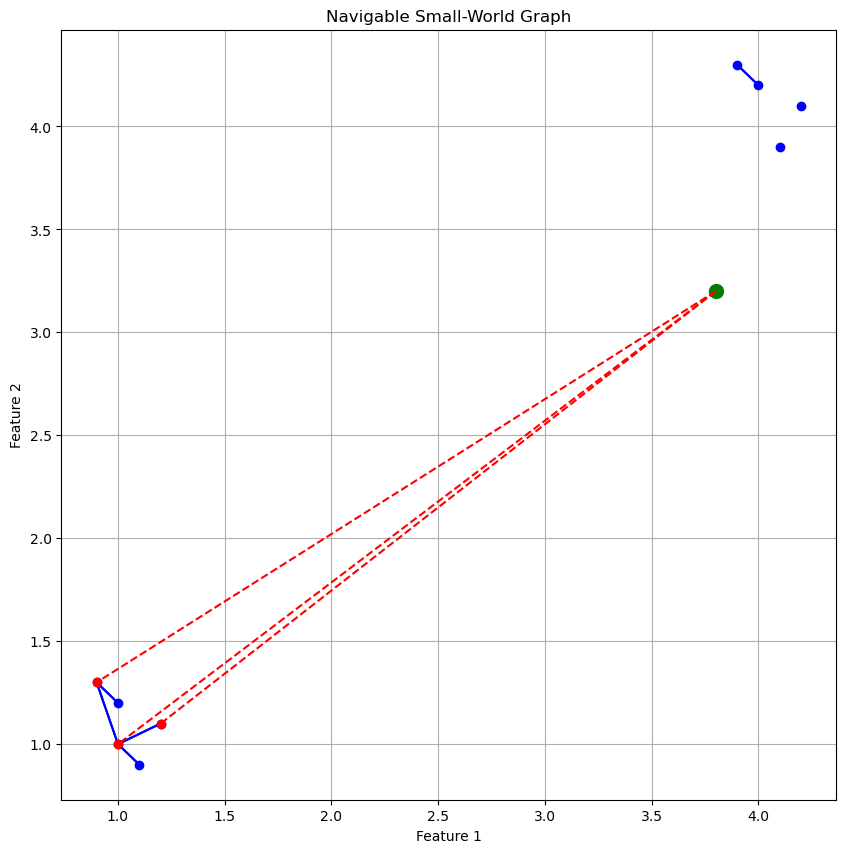

In [30]:
import numpy as np
import heapq  # Priority queue
import logging
import math
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

class Node:
    def __init__(self, idx, data):
        self.idx = idx  # unique identifier
        self.data = data  # feature vector
        self.neighbors = []  # neighboring nodes

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)

class NSWGraph:
    def __init__(self, m=3):
        self.graph = []
        self.m = m # maximum number of edges each node has

    def distance(self, node1, node2):
        return math.sqrt(sum((x-y)**2 for x, y in zip(node1.data, node2.data)))

    def insert(self, node):
        logging.info(f"Inserting node {node.idx} with vector {node.data} into the graph...")
        if len(self.graph) > 0:
            candidates = self.graph[:]
            for _ in range(self.m):
                if not candidates:
                    break
                nearest = min(candidates, key=lambda x: self.distance(x, node))
                node.add_neighbor(nearest)
                nearest.add_neighbor(node)
                candidates.remove(nearest)
                logging.info(f"Node {node.idx} connected with node {nearest.idx}")
        self.graph.append(node)
        logging.info(f"Node {node.idx} inserted.\n")

    def search(self, query, k):
        logging.info(f"Searching {k} nearest neighbors for node {query.data}...")
        visited = set()
        candidates = [(0, self.graph[0])]
        nearest_neighbors = []

        while candidates and len(nearest_neighbors) < k:
            _, current_node = heapq.heappop(candidates)
            if current_node in visited:
                continue
            visited.add(current_node)

            d = self.distance(current_node, query)
            if len(nearest_neighbors) < k or d < nearest_neighbors[-1][0]:
                heapq.heappush(nearest_neighbors, (d, current_node))
                if len(nearest_neighbors) > k:
                    heapq.heappop(nearest_neighbors)
                logging.info(f"Node {current_node.idx} considered as a neighbor with distance {d:.4f}")

            for neighbor in current_node.neighbors:
                if neighbor not in visited:
                    heapq.heappush(candidates, (self.distance(neighbor, query), neighbor))

        logging.info(f"Search complete. {k} nearest neighbors found.\n")
        return [x[1] for x in nearest_neighbors]

    def remove_node(self, remove_idx):
        print(f"Removing node with idx: {remove_idx}")

        # Validate index
        if remove_idx >= len(self.graph) or remove_idx < 0:
            print("Index out of bounds. Node not removed.")
            return

        # Remove references to the node in neighbors' lists
        node_to_remove = self.graph[remove_idx]
        for node in self.graph:
            node.neighbors = [neighbor for neighbor in node.neighbors if neighbor.idx != remove_idx]

        # Remove the node from the graph
        del self.graph[remove_idx]

        # Update indexes of nodes that followed the removed node
        for i in range(remove_idx, len(self.graph)):
            self.graph[i].idx -= 1

        # Log: Node removed
        print(f"Node with idx {remove_idx} removed.")

    def ensure_connectivity(self):
        # TODO: implement this
        pass


def visualize_nsw(graph, query=None, k_neighbors=None):
    plt.figure(figsize=(10, 10))

    # Plot all nodes
    for node in graph:
        plt.plot(node.data[0], node.data[1], 'bo')

    # Plot edges
    for node in graph:
        for neighbor in node.neighbors:
            plt.plot([node.data[0], neighbor.data[0]], [node.data[1], neighbor.data[1]], 'b-')

    # Highlight query node if provided
    if query is not None:
        plt.plot(query.data[0], query.data[1], 'go', markersize=10)

    # Highlight and connect k-nearest neighbors if provided
    if k_neighbors is not None:
        for neighbor in k_neighbors:
            plt.plot(neighbor.data[0], neighbor.data[1], 'ro')
            if query is not None:
                plt.plot([query.data[0], neighbor.data[0]], [query.data[1], neighbor.data[1]], 'r--')

    plt.title("Navigable Small-World Graph")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

# 2D points in two separate clusters
data_points = np.array([
    [1, 1], [1.2, 1.1], [0.9, 1.3], [1.1, 0.9], [1, 1.2],  # Cluster 1
    [4, 4], [4.2, 4.1], [3.9, 4.3], [4.1, 3.9], [4, 4.2]   # Cluster 2
])

# Initialize NSW graph with m=1 which is quite small
nsw_graph = NSWGraph(m=1)

# Insert nodes into the graph
for idx, point in enumerate(data_points):
    nsw_graph.insert(Node(idx, point))

nsw_graph.remove_node(5)
# Ensure connectivity
nsw_graph.ensure_connectivity()

query = Node(-1, np.array([3.8, 3.2]))

k_neighbors = nsw_graph.search(query, k=3)

visualize_nsw(nsw_graph.graph, query, k_neighbors)